In [75]:
# import de libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)


print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12339, 6)
2020 (14666, 6)


In [76]:
# verifica os tipos de doencas 2020
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [77]:
# total de cada doenca 2019
dados_2019["tipo_doenca"].value_counts()

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [78]:
# total de cada doenca 2020
dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [79]:
dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [80]:
# soma total de mortes de cada doenca
dados_2020.groupby(["tipo_doenca"])["total"].sum()

tipo_doenca
COVID                         177299
INDETERMINADA                   9063
INSUFICIENCIA_RESPIRATORIA     93304
OUTRAS                        647807
PNEUMONIA                     171938
SEPTICEMIA                    153033
SRAG                           15715
Name: total, dtype: int64

In [81]:
# soma total de mortes de cada doenca
dados_2020.groupby(["local_obito"])["total"].sum()

local_obito
AMBULANCIA                  149
DOMICILIO                244260
HOSPITAL                 886690
IGNORADO                  25752
OUTRO                     26658
OUTROS_SERVICOS_SAUDE     68431
POSTO_SAUDE                 612
SAMU                         19
VIA_PUBLICA               15588
Name: total, dtype: int64

In [82]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()

In [83]:
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [84]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12339 entries, 0 to 12338
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12339 non-null  object
 1   tipo_doenca   12339 non-null  object
 2   local_obito   12339 non-null  object
 3   faixa_etaria  12339 non-null  object
 4   sexo          12337 non-null  object
 5   total         12339 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 578.5+ KB


In [85]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [86]:
# porcentagem de obitos
proporcao = total_obitos_2020 / total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


In [88]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()

    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    dados = pd.DataFrame({"Total": lista, 
                            "Ano": [2019, 2020]})

    plt.figure(figsize = (8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()

In [89]:
## grafico comparativo por estado
def grafico_comparativo_estado(causa, uf = "BRASIL"):

    ## select para estado
    ## dados_estado_2019 = dados_2019.query("uf == SP")
    ## dados_estado_2020 = dados_2020.query("uf == SP")

    if uf == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    else:    
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista = [int(total_2019.loc[uf, causa]), int(total_2020.loc[uf, causa])]

    dados = pd.DataFrame({"Total": lista, 
                            "Ano": [2019, 2020]})

    plt.figure(figsize = (8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa} - {uf}")
    plt.show()

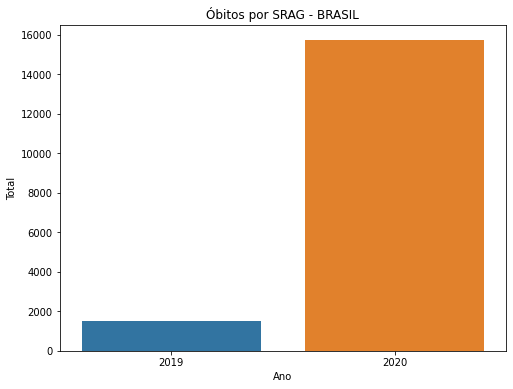

In [61]:
grafico_comparativo_estado("SRAG")

In [91]:
## grafico comparativo por estado
def grafico_comparativo_doencas(causa, uf = "BRASIL"):

    if uf == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    else:    
        total_2019 = dados_2019.groupby(["tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["tipo_doenca"]).sum()
        lista = [int(total_2019.loc[uf, causa]), int(total_2020.loc[uf, causa])]

    dados = pd.DataFrame({"Total": lista, 
                            "Ano": [2019, 2020]})

    plt.figure(figsize = (8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa} - {uf}")
    plt.show()

In [92]:
grafico_comparativo_estado()

TypeError: grafico_comparativo_estado() missing 1 required positional argument: 'causa'